In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

In [203]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [204]:
import seaborn as sns

In [205]:
#sns.pairplot(df, hue = "Outcome")

In [206]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [207]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [208]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [209]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [210]:
df.shape

(768, 8)

In [211]:
class Ann_Dia(nn.Module):
    def __init__(self, input_features= 7, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [212]:
torch.manual_seed(20)
model = Ann_Dia()

In [213]:
model.parameters

<bound method Module.parameters of Ann_Dia(
  (f_connected1): Linear(in_features=7, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [214]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [215]:
epochs = 1500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(x_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i %50 == 1:
        print("Epoch Number: {} and The Loss is: {}".format(i,loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and The Loss is: 2.454572916030884
Epoch Number: 51 and The Loss is: 0.5592770576477051
Epoch Number: 101 and The Loss is: 0.477567195892334
Epoch Number: 151 and The Loss is: 0.434358149766922
Epoch Number: 201 and The Loss is: 0.40634411573410034
Epoch Number: 251 and The Loss is: 0.3852420151233673
Epoch Number: 301 and The Loss is: 0.35646283626556396
Epoch Number: 351 and The Loss is: 0.3333718776702881
Epoch Number: 401 and The Loss is: 0.32945820689201355
Epoch Number: 451 and The Loss is: 0.31913116574287415
Epoch Number: 501 and The Loss is: 0.2925035357475281
Epoch Number: 551 and The Loss is: 0.2846338152885437
Epoch Number: 601 and The Loss is: 0.2893933057785034
Epoch Number: 651 and The Loss is: 0.25755396485328674
Epoch Number: 701 and The Loss is: 0.2735658288002014
Epoch Number: 751 and The Loss is: 0.2450132817029953
Epoch Number: 801 and The Loss is: 0.24141916632652283
Epoch Number: 851 and The Loss is: 0.2356109917163849
Epoch Number: 901 and The Lo

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Epochs')

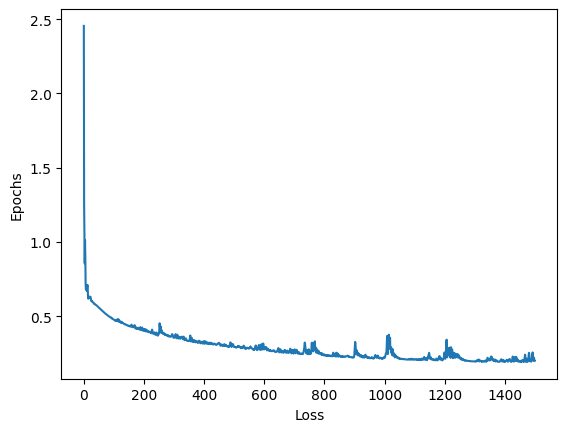

In [217]:
final_losses_tensor = torch.tensor(final_losses)
final_losses_numpy = final_losses_tensor.detach().numpy()
plt.plot(range(epochs),final_losses_numpy)
plt.xlabel("Loss")
plt.ylabel("Epochs")

In [218]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
print(predictions)

[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [219]:
l= [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 
 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 
 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 
 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [220]:
x_test[0]

tensor([ 98.0000,  58.0000,  33.0000, 190.0000,  34.0000,   0.4300,  43.0000])

In [221]:
torch.no_grad

torch.autograd.grad_mode.no_grad

In [222]:
y_pred

tensor([ 21.7522, -21.0127])

In [223]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [224]:
acc = accuracy_score(y_test,predictions)
print("Accuracy is:", acc)
cnf = confusion_matrix(y_test,predictions)
print("Confusion Matrix is :\n", cnf)

Accuracy is: 0.7012987012987013
Confusion Matrix is :
 [[117  34]
 [ 35  45]]


In [225]:
#Save The Model

torch.save(model, "diabetes.pt")

In [226]:
model.eval

<bound method Module.eval of Ann_Dia(
  (f_connected1): Linear(in_features=7, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [227]:
lst1 = list(df.iloc[0,:-1])
lst1

[148.0, 50.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [228]:
lst2 = [198.0, 78.0, 49.0, 0.0, 42.6, 0.787, 60.0]

In [229]:
new_data = torch.tensor(lst2)

In [231]:
with torch.no_grad():
    model(new_data)
    print(model(new_data).argmax().item())

1


In [232]:
print(model(new_data).argmax().item())

1


In [233]:
model(new_data)

tensor([-7.0564,  7.5313], grad_fn=<AddBackward0>)